# Dual Contouring

Dual Contouring extracts a **quad mesh** with vertices placed optimally within each cell. Unlike Marching Cubes, it can preserve sharp features when given accurate surface normals.


In [1]:
import torch
import isoext
from isoext.sdf import CuboidSDF, get_sdf_normal
from _viz import show_mesh


## The Algorithm

Dual Contouring works in three steps:

1. **Find intersections** — Locate where grid edges cross the iso-surface
2. **Compute normals** — Get surface normals at intersection points
3. **Solve QEF** — Find optimal vertex position per cell by minimizing quadric error


In [2]:
# Create a cube (has sharp edges — good test for DC)
grid = isoext.UniformGrid([64, 64, 64])
cube = CuboidSDF(size=[1.0, 1.0, 1.0])
grid.set_values(cube(grid.get_points()))

# Step 1: Find edge-surface intersections
intersection = isoext.get_intersection(grid, level=0.0)
print(f"Found {intersection.get_points().shape[0]:,} intersection points")


Found 24,576 intersection points


In [3]:
# Step 2: Compute accurate normals using the SDF gradient
points = intersection.get_points()
normals = get_sdf_normal(cube, points)
intersection.set_normals(normals)

print(f"Normals shape: {normals.shape}")


Normals shape: torch.Size([24576, 3])


Vertices: torch.Size([6146, 3])
Faces: torch.Size([12288, 3])


2025-12-30 01:12:25.315 (   0.797s) [    78ED6D44D740]vtkXOpenGLRenderWindow.:1458  WARN| bad X server connection. DISPLAY=


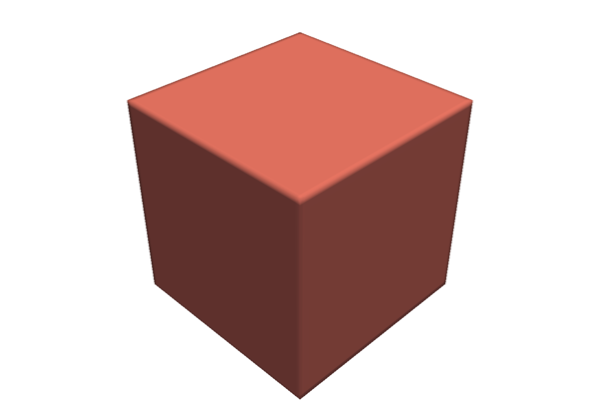

In [4]:
# Step 3: Run dual contouring
vertices, faces = isoext.dual_contouring(grid, intersection, level=0.0)

print(f"Vertices: {vertices.shape}")  # (N, 3) float32
print(f"Faces: {faces.shape}")        # (M, 4) uint32 — quads!

show_mesh(vertices, faces, color="salmon")
